In [1]:
import orjson
import matplotlib.pyplot as plt
from snsphd import viz
import numpy as np
from IPython.display import JSON
from enum import Enum
from structure import TomoCounts, Bin, Phase, create_matrix_row, print_matrix
from structure import shiftedColorMap
import matplotlib
from qutip import *

Colors, Swatches = viz.phd_style(jupyterStyle=True, grid=True)
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap


## 1. Density Matrix and Rate Parameters for one channel pairing
First we load one dataset and create one density matrix. 

In [2]:
with open("../data/channel_visibility_dm_high_power/channel_visibility_dm_high_power_36_58.json", "rb") as f:
    data = orjson.loads(f.read())

In [3]:
# cmap = create_custom_cmap()
cmap = matplotlib.cm.viridis

In [4]:
for i, item in enumerate(data["results"]):
    try:
        print(f"{i}: label: {item['label']}")
    except:
        print(f"{i}: no label. Keys: {item.keys()}")

0: label: default_label
1: label: default_label
2: label: default_label
3: label: min scan 1
4: label: default_label
5: label: default_label
6: label: min integrate low power
7: label: default_label
8: label: default_label
9: label: min integrate high power
10: label: default_label
11: label: default_label
12: label: default_label
13: label: min scan 2
14: label: default_label
15: label: default_label
16: label: default_label
17: label: default_label
18: label: min-defined max integration low power
19: label: default_label
20: label: default_label
21: label: min-defined max integration high power
22: label: default_label
23: label: default_label
24: label: default_label
25: label: 90 degree integration low power
26: label: default_label
27: label: default_label
28: label: 90 degree integration high power
29: label: default_label
30: label: default_label
31: label: default_label
32: label: default_label
33: label: default_label
34: label: default_label
35: label: grad-defined max integr

In [5]:
res = {}
for item in data["results"]:
    # print(item['label'])
    if item.get("label"):
        if item["label"] != "default_label":
            # print(item.keys())
            # print(item["result"])
            dic = item["results"]
            if item.get("integration_results"):
                dic["integration_results"] = item["integration_results"]
            res[item["label"]] = dic

In [6]:
phase_0_0 = {
    "low_power": res["grad-defined max integration low power"]["integration_results"],
    "high_power": res["grad-defined max integration high power"]["integration_results"],
}

phase_90_0 = {
    "low_power": res["90 degree integration low power"],
    "high_power": res["90 degree integration high power"],
}

phase_90_90 = {
    "low_power": res["min integrate low power"]["integration_results"],
    "high_power": res["min integrate high power"]["integration_results"],
}

phase_0_0_alt = {
    "low_power": res["min-defined max integration low power"],
    "high_power": res["min-defined max integration high power"],
}

In [7]:
tomo = TomoCounts()


idx = 4
ddic = phase_0_0["low_power"][idx]
tomo.fill(Phase.DD, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"])


ddic = phase_90_0["low_power"][idx]
tomo.fill(Phase.DR, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"])
# print("length: ", len(ddic["full_coinc_1"]))
# print("delta time: ", ddic["delta_time"])

ddic = phase_90_0["low_power"][idx]
tomo.fill(Phase.RD, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"])

ddic = phase_90_90["low_power"][idx]
tomo.fill(Phase.RR, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"])

print(tomo)

phase		|dd>		|dr>		|rd>		|rr>
ee: 		160.34		158.49		158.49		161.96		
el: 		0.34		0.27		0.27		0.33		
ed: 		137.56		0.0		143.26		0.0		
er: 		0.0		143.26		0.0		139.94		
le: 		0.14		0.32		0.32		0.17		
ll: 		85.96		92.47		92.47		91.72		
ld: 		104.13		0.0		107.03		0.0		
lr: 		0.0		107.03		0.0		106.75		
de: 		127.95		128.71		0.0		0.0		
dl: 		111.22		111.09		0.0		0.0		
dd: 		455.23		0.0		0.0		0.0		
dr: 		0.0		225.96		0.0		0.0		
re: 		0.0		0.0		128.71		129.59		
rl: 		0.0		0.0		111.09		114.82		
rd: 		0.0		0.0		225.96		0.0		
rr: 		0.0		0.0		0.0		1.59		



In [8]:
tomo.calculate_density_matrix()
tomo.rho

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 5.93718397e-01-3.73345251e-19j  5.16548135e-04+2.31357582e-02j
  -1.49541636e-02+2.50177133e-02j  4.88183209e-01+2.72398428e-02j]
 [ 5.16548135e-04-2.31357582e-02j  1.31002274e-03+5.96070176e-22j
   1.02642214e-03+5.64902394e-04j  1.92003602e-03-1.85913806e-02j]
 [-1.49541636e-02-2.50177133e-02j  1.02642214e-03-5.64902394e-04j
   1.44488918e-03-2.61164749e-20j -1.11191768e-02-2.11501596e-02j]
 [ 4.88183209e-01-2.72398428e-02j  1.92003602e-03+1.85913806e-02j
  -1.11191768e-02+2.11501596e-02j  4.03526691e-01+3.98865656e-19j]]

In [9]:
print(tomo)
print(f"log negativity: {tomo.calculate_log_negativity(tomo.rho)}")
print(f"coherent information: {tomo.calculate_coherent_information(tomo.rho)}")
print(f"fidelity: {tomo.calculate_fidelity()}")

phase		|dd>		|dr>		|rd>		|rr>
ee: 		160.34		158.49		158.49		161.96		
el: 		0.34		0.27		0.27		0.33		
ed: 		137.56		0.0		143.26		0.0		
er: 		0.0		143.26		0.0		139.94		
le: 		0.14		0.32		0.32		0.17		
ll: 		85.96		92.47		92.47		91.72		
ld: 		104.13		0.0		107.03		0.0		
lr: 		0.0		107.03		0.0		106.75		
de: 		127.95		128.71		0.0		0.0		
dl: 		111.22		111.09		0.0		0.0		
dd: 		455.23		0.0		0.0		0.0		
dr: 		0.0		225.96		0.0		0.0		
re: 		0.0		0.0		128.71		129.59		
rl: 		0.0		0.0		111.09		114.82		
rd: 		0.0		0.0		225.96		0.0		
rr: 		0.0		0.0		0.0		1.59		

log negativity: 0.985110837515687
coherent information: 0.9623637481374591
fidelity: 99.650726006634





### $\rho^{T_A}$ is the partial transpose of the the bipartite mixed state $\rho$. 
### The expression for log negativity of density matrix $\rho$ is: $E_N(\rho) = \mathrm{log_2}||\rho^{T_A}||$
### Where $||\rho^{T_A}||$ is the trace norm of $\rho^{T_A}$

In [10]:
# # Create the real 3D bar plot
# orig_cmap = matplotlib.cm.coolwarm
# shifted_cmap = shiftedColorMap(orig_cmap, start=-0.75, midpoint=0, stop=0.75, name='shifted')

from qutip import *

dm_bell = ket2dm(bell_state(state="00"))
fidelity(dm_bell, tomo.rho)

0.9933809771655024

<class 'matplotlib.colors.LinearSegmentedColormap'>
<class 'matplotlib.colors.LinearSegmentedColormap'>
['..', 'figs', 'density_matrix']
../figs/


Traceback (most recent call last):
  File "C:\Users\Andrew\OneDrive - California Institute of Technology\.Thesis\python_package\thesis\src\snsphd\viz.py", line 354, in save_light_dark_all
    pickle.dump(fig, buf)
AttributeError: Can't pickle local object '_remove_margins.<locals>._get_coord_info_new'


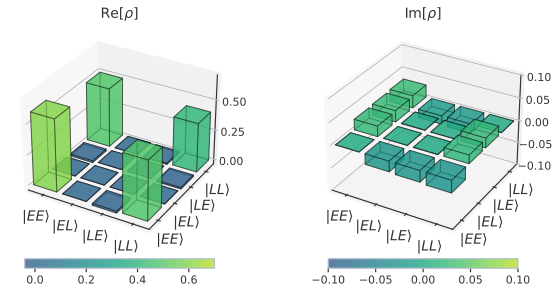

In [11]:
from matrix_histogram import matrix_histogram, matrix_histogram_complex


fig, (ax_real, ax_imag) = plt.subplots(
    1, 2, subplot_kw={"projection": "3d"}, figsize=(10, 5)
)

xlabels = [r"$|EE\rangle$", r"$|EL\rangle$", r"$|LE\rangle$", r"$|LL\rangle$"]
ylabels = [r"$|EE\rangle$", r"$|EL\rangle$", r"$|LE\rangle$", r"$|LL\rangle$"]
fig, ax_real = matrix_histogram(
    np.real(tomo.rho.full()),
    xlabels,
    xlabels,
    limits=[-0.04, 0.7],
    title=r"Re[$\rho$]",
    fig=fig,
    ax=ax_real,
    options={
        "cmap": cmap,
        "cmap_max": 0.9,
        "cmap_min": 0.3,
        "bars_alpha": 0.6,
        "bars_lw": 1,
        "colorbar_alpha": 0.8,
        "zticks": [0.0, 0.25, 0.5],
        "bars_edgecolor": [0, 0, 0, 0.4],
    },
)

fig, ax_imag = matrix_histogram(
    np.imag(tomo.rho.full()),
    xlabels,
    xlabels,
    limits=[-0.1, 0.1],
    title=r"Im[$\rho$]",
    fig=fig,
    ax=ax_imag,
    options={
        "cmap": cmap,
        "cmap_max": 0.9,
        "cmap_min": 0.3,
        "bars_alpha": 0.6,
        "bars_lw": 1,
        "colorbar_alpha": 0.8,
        "zticks": [-0.1, -0.05, 0.0, 0.05, 0.1],
        "bars_edgecolor": [0, 0, 0, 0.4],
    },
)
ax_real.set_facecolor("none")
ax_imag.set_facecolor("none")
plt.savefig("density_matrix.svg")
plt.savefig("density_matrix.pdf")

viz.save_light_dark_all(fig, "../figs/density_matrix")

## 2. Density Matrix and Rate Parameters for 8 Channel Pairings
Now we loop over the 8 channel pairs and apply the above techniques. 
With this, we create the final 8-channel pair bar graph, which is the last figure in the main paper

In [12]:
json_datas = []
chA = [35, 36, 37, 38, 39, 40, 41, 42]
chB = [59, 58, 57, 56, 55, 54, 53, 52]
for i, (cha, chb) in enumerate(zip(chA, chB)):
    with open(f"../data/channel_visibility_dm_high_power/channel_visibility_dm_high_power_{cha}_{chb}.json", "rb") as f:
        json_datas.append(orjson.loads(f.read()))

In [13]:
# explained in the supplemental section "Coincidence Rate & Interferometer Output Ports"

# these extrapolate coincidence rates for 2 and 4 branches of the full wavefunction, given rates for the one branch measured
def one_branch_to_two_branch(entanglement_rate):
    Ra = 0.99
    return entanglement_rate*(1 + Ra)

def two_branch_to_four_branch(entanglement_rate):
    Ra = 0.99
    Rb = 1.04
    return entanglement_rate*(1 + Ra + Rb + Ra*Rb)/(1 + Ra)

In [14]:
# There are 5 integrations for each phase setting and each power. [len(phase_0_0_power) = 5]
# For each of these integrations, create a density matrix and calculate coherent info, log negativity, fidelity, and rates


def fill_arrays(phase_0_0_power, phase_90_0_power, phase_90_90_power):
    this_power_coherent_infos = []
    this_power_log_negativities = []
    fidelities = []
    rates = []
    singles_A = []
    singles_B = []
    
    for idx in range(len(phase_0_0_power)):
        
        
        total_rate = (
            one_branch_to_two_branch(phase_90_0_power[idx]["total_coincidences"]
            / phase_90_0_power[idx]["delta_time"])
        )
        # should be updated to remove guard regions
        min_state_rate = (
            phase_90_90_power[idx]["counts"] / phase_90_90_power[idx]["delta_time"]
        )
        max_state_rate = (
            phase_0_0_power[idx]["counts"] / phase_0_0_power[idx]["delta_time"]
        )

        # singles_A.append(np.sum(sect.singles_hist_1) / sect.delta_time)
        singles_A.append(np.sum(phase_90_0_power[idx]["singles_hist_1"]) / phase_90_0_power[idx]["delta_time"])
        singles_B.append(np.sum(phase_90_0_power[idx]["singles_hist_2"]) / phase_90_0_power[idx]["delta_time"])

        fid = 1 - (min_state_rate / max_state_rate)
        tomo = TomoCounts()
        ddic = phase_0_0_power[idx]
        tomo.fill(
            Phase.DD, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"]
        )
        ddic = phase_90_0_power[idx]
        tomo.fill(
            Phase.DR, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"]
        )
        # print("length: ", len(ddic["full_coinc_1"]))
        # print("delta time: ", ddic["delta_time"])
        ddic = phase_90_0_power[idx]
        tomo.fill(
            Phase.RD, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"]
        )
        ddic = phase_90_90_power[idx]
        tomo.fill(
            Phase.RR, ddic["full_coinc_1"], ddic["full_coinc_2"], ddic["delta_time"]
        )
        tomo.calculate_density_matrix()
        log_negativity = tomo.calculate_log_negativity(tomo.rho)
        this_power_log_negativities.append(log_negativity)
        # print(f" power {powers[i]}, idx {idx}, log_negativity: {log_negativity}")

        coherent_info = tomo.calculate_coherent_information(tomo.rho)
        this_power_coherent_infos.append(coherent_info)
        # print(f" power {powers[i]}, idx {idx}, coherent_info: {coherent_info}")
        fidelities.append(fid)
        rates.append(total_rate)

    return rates, fidelities, this_power_coherent_infos, this_power_log_negativities, singles_A, singles_B

In [15]:
import json
with open("mcr.json", "r") as file:
    mcr_data = json.load(file)

# mcr_data.keys()
mcr_count_rates = mcr_data["count_rates"]
mcr_eff_efficiencies = mcr_data["eff_efficiencies"]

geometric_factor = (
        0.393  # a result of the JSI modelling analysis: gamma_geo = 0.393 +/- 0.012
        )

In [30]:
from pydantic import BaseModel, validator
import json
import orjson


def orjson_dumps(v, *, default):
    # orjson.dumps returns bytes, to match standard json.dumps we need to decode
    return orjson.dumps(v, option = orjson.OPT_SERIALIZE_NUMPY, default=default).decode()

class AvgStd(BaseModel):
    avg: np.ndarray
    std: np.ndarray

    @validator("avg", "std", pre=True)
    def to_numpy_float(cls, value) -> np.ndarray:
        return np.array(value, dtype=float)

    class Config:
        arbitrary_types_allowed = True


class PowerArrays(BaseModel):
    low: AvgStd
    high: AvgStd


class PowerArraysSingle(BaseModel):
    low: np.ndarray
    high: np.ndarray

    @validator("low", "high", pre=True)
    def to_numpy_float(cls, value) -> np.ndarray:
        return np.array(value, dtype=float)

    class Config:
        arbitrary_types_allowed = True


class GraphData(BaseModel):
    rates: PowerArrays
    fidelities: PowerArrays
    coherent_infos: PowerArrays
    log_negativities: PowerArrays
    singles_A: PowerArrays
    singles_B: PowerArrays
    mu: PowerArraysSingle

    # @validator("mu", pre=True)
    # def to_numpy_float(cls, value) -> np.ndarray:
    #     return np.array(value, dtype=float)

    class Config:
        arbitrary_types_allowed = True
        json_loads = orjson.loads
        json_dumps = orjson_dumps


# class GraphData(BaseModel):
#     avg: np.ndarray  # ultimately gets converted to np.ndarray, but 'list' keeps mypy happy
#     std: np.ndarray


recompute = True


if recompute:
    coherent_infos_avg = {"low_power": [], "high_power": []}
    coherent_infos_std = {"low_power": [], "high_power": []}
    log_negativities_avg = {"low_power": [], "high_power": []}
    log_negativities_std = {"low_power": [], "high_power": []}
    fidelities_avg = {"low_power": [], "high_power": []}
    fidelities_std = {"low_power": [], "high_power": []}
    rates_avg = {"low_power": [], "high_power": []}
    rates_std = {"low_power": [], "high_power": []}
    singles_A_avg = {"low_power": [], "high_power": []}
    singles_A_std = {"low_power": [], "high_power": []}
    singles_B_avg = {"low_power": [], "high_power": []}
    singles_B_std = {"low_power": [], "high_power": []}
    mu = {"low_power": [], "high_power": []}

    for data_set in json_datas:  # loop over 8 files
        res = {}
        for item in data_set["results"]:  # loop over sub-measurments in each file
            # print(item['label'])
            if item.get("label"):
                if item["label"] != "default_label":
                    # print(item.keys())
                    # print(item["result"])
                    dic = item["results"]
                    if item.get("integration_results"):
                        dic["integration_results"] = item["integration_results"]
                    res[item["label"]] = dic
        # print(res.keys())
        phase_0_0 = {
            "low_power": res["grad-defined max integration low power"][
                "integration_results"
            ],
            "high_power": res["grad-defined max integration high power"][
                "integration_results"
            ],
        }

        phase_90_0 = {
            "low_power": res["90 degree integration low power"],
            "high_power": res["90 degree integration high power"],
        }

        phase_90_90 = {
            "low_power": res["min integrate low power"]["integration_results"],
            "high_power": res["min integrate high power"]["integration_results"],
        }

        phase_0_0_alt = {
            "low_power": res["min-defined max integration low power"],
            "high_power": res["min-defined max integration high power"],
        }

        ######### low power
        (
            rates,
            fidelities,
            this_power_coherent_infos,
            this_power_log_negativities,
            singles_A,
            singles_B,
        ) = fill_arrays(
            phase_0_0["low_power"], phase_90_0["low_power"], phase_90_90["low_power"]
        )
        rates_avg["low_power"].append(np.average(rates))
        rates_std["low_power"].append(np.std(rates))
        fidelities_avg["low_power"].append(np.average(fidelities))
        fidelities_std["low_power"].append(np.std(fidelities))

        coherent_infos_avg["low_power"].append(np.average(this_power_coherent_infos))
        coherent_infos_std["low_power"].append(np.std(this_power_coherent_infos))
        log_negativities_avg["low_power"].append(
            np.average(this_power_log_negativities)
        )
        log_negativities_std["low_power"].append(np.std(this_power_log_negativities))
        singles_A_avg["low_power"].append(np.average(singles_A))
        singles_A_std["low_power"].append(np.std(singles_A))
        singles_B_avg["low_power"].append(np.average(singles_B))
        singles_B_std["low_power"].append(np.std(singles_B))

        singles_A_efficiency_correction = np.interp(
            np.average(singles_A), mcr_count_rates, mcr_eff_efficiencies
        )
        singles_A_linearized = np.average(singles_A) / singles_A_efficiency_correction

        singles_B_efficiency_correction = np.interp(
            np.average(singles_B), mcr_count_rates, mcr_eff_efficiencies
        )
        singles_B_linearized = np.average(singles_B) / singles_B_efficiency_correction

        # print(singles_A_linearized, singles_B_linearized, geometric_factor, np.average(rates))
        mu["low_power"].append(
            (singles_A_linearized * singles_B_linearized * geometric_factor)
            / (np.average(rates) * 4e9)
        )

        ######### high_power
        (
            rates,
            fidelities,
            this_power_coherent_infos,
            this_power_log_negativities,
            singles_A,
            singles_B,
        ) = fill_arrays(
            phase_0_0["high_power"], phase_90_0["high_power"], phase_90_90["high_power"]
        )
        rates_avg["high_power"].append(np.average(rates))
        rates_std["high_power"].append(np.std(rates))
        fidelities_avg["high_power"].append(np.average(fidelities))
        fidelities_std["high_power"].append(np.std(fidelities))

        coherent_infos_avg["high_power"].append(np.average(this_power_coherent_infos))
        coherent_infos_std["high_power"].append(np.std(this_power_coherent_infos))
        log_negativities_avg["high_power"].append(
            np.average(this_power_log_negativities)
        )
        log_negativities_std["high_power"].append(np.std(this_power_log_negativities))
        singles_A_avg["high_power"].append(np.average(singles_A))
        singles_A_std["high_power"].append(np.std(singles_A))
        singles_B_avg["high_power"].append(np.average(singles_B))
        singles_B_std["high_power"].append(np.std(singles_B))

        singles_A_efficiency_correction = np.interp(
            np.average(singles_A), mcr_count_rates, mcr_eff_efficiencies
        )
        singles_A_linearized = np.average(singles_A) / singles_A_efficiency_correction

        singles_B_efficiency_correction = np.interp(
            np.average(singles_B), mcr_count_rates, mcr_eff_efficiencies
        )
        singles_B_linearized = np.average(singles_B) / singles_B_efficiency_correction

        mu["high_power"].append(
            (singles_A_linearized * singles_B_linearized * geometric_factor)
            / (np.average(rates) * 4e9)
        )

    print(mu)

    graph_data = GraphData(
        rates=PowerArrays(
            low=AvgStd(avg=rates_avg["low_power"], std=rates_std["low_power"]),
            high=AvgStd(avg=rates_avg["high_power"], std=rates_std["high_power"]),
        ),
        fidelities=PowerArrays(
            low=AvgStd(
                avg=fidelities_avg["low_power"], std=fidelities_std["low_power"]
            ),
            high=AvgStd(
                avg=fidelities_avg["high_power"], std=fidelities_std["high_power"]
            ),
        ),
        coherent_infos=PowerArrays(
            low=AvgStd(
                avg=coherent_infos_avg["low_power"], std=coherent_infos_std["low_power"]
            ),
            high=AvgStd(
                avg=coherent_infos_avg["high_power"],
                std=coherent_infos_std["high_power"],
            ),
        ),
        log_negativities=PowerArrays(
            low=AvgStd(
                avg=log_negativities_avg["low_power"],
                std=log_negativities_std["low_power"],
            ),
            high=AvgStd(
                avg=log_negativities_avg["high_power"],
                std=log_negativities_std["high_power"],
            ),
        ),
        singles_A=PowerArrays(
            low=AvgStd(avg=singles_A_avg["low_power"], std=singles_A_std["low_power"]),
            high=AvgStd(
                avg=singles_A_avg["high_power"], std=singles_A_std["high_power"]
            ),
        ),
        singles_B=PowerArrays(
            low=AvgStd(avg=singles_B_avg["low_power"], std=singles_B_std["low_power"]),
            high=AvgStd(
                avg=singles_B_avg["high_power"], std=singles_B_std["high_power"]
            ),
        ),
        mu=PowerArraysSingle(low=mu["low_power"], high=mu["high_power"]),
    )

    with open("graph_data.json", "w") as file:
        file.write(graph_data.json())

else:
    with open("graph_data.json", "r") as file:
        graph_data_dict = json.load(file)
    graph_data = GraphData(**graph_data_dict)

# extrapolate to 4 branches
graph_data.rates.low.avg = two_branch_to_four_branch(graph_data.rates.low.avg)
graph_data.rates.high.avg = two_branch_to_four_branch(graph_data.rates.high.avg)

c:\Users\Andrew\mambaforge\envs\research11\Lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)


{'low_power': [5.8748831567079275e-05, 5.9026574836781745e-05, 6.212763055764604e-05, 3.7790667856090996e-05, 5.609775358044357e-05, 5.4943301987501905e-05, 5.131921918541736e-05, 7.187991367975715e-05], 'high_power': [0.005438008281552087, 0.006253867870813375, 0.006083325683920066, 0.006089884074616971, 0.006014595714343743, 0.005988300932498764, 0.006388177910509644, 0.006730839217608683]}


In [31]:
# print(np.average(graph_data.mu["low_power"]))
# print(np.std(graph_data.mu["low_power"]))

mu_low_avg = round(np.average(graph_data.mu.low),6)
mu_low_std = round(np.std(graph_data.mu.low),6)

mu_high_avg = round(np.average(graph_data.mu.high),4)
mu_high_std = round(np.std(graph_data.mu.high),4)



print("mu_low_avg: ", mu_low_avg)
print("mu_low_std: ", mu_low_std)
print("mu_high_avg: ", mu_high_avg)
print("mu_high_std: ", mu_high_std)

mu_low_avg:  5.6e-05
mu_low_std:  9e-06
mu_high_avg:  0.0061
mu_high_std:  0.0003


In [40]:
from snsphd.layout import bisect

width = 0.25  # the width of the bars
error_line = dict(lw=5, capsize=0, capthick=3, alpha=0.3, color="black")

low_dict = {"error_kw": error_line, "color": cmap(0.7), "alpha": 0.7}
high_dict = {"error_kw": error_line, "color": cmap(0.35), "alpha": 0.5}

rates_low_dict = low_dict.copy()
rates_low_dict.pop("alpha")

rates_high_dict = high_dict.copy()
rates_high_dict.pop("alpha")


def create_fidelities_graph(ax, gd: GraphData):
    data_labels = [str(cha) + ", " + str(chb) for cha, chb in zip(chA, chB)]
    x = np.arange(len(data_labels))  # the label locations
    multiplier = 0
    rects = ax.bar(
        x + 0,
        np.array(gd.fidelities.low.avg) * 100,
        width,
        yerr=np.array(gd.fidelities.low.std) * 100,
        label=r"fidelity, $\mu=\mu_{low}$",
        **low_dict,
    )
    ax.bar_label(
        rects,
        padding=3,
        labels=[
            f"{round(v,2)}±{round(e,2)}"
            for v, e in zip(
                np.array(gd.fidelities.low.avg) * 100,
                np.array(gd.fidelities.low.std) * 100,
            )
        ],
    )

    rects = ax.bar(
        x + width * 1,
        np.array(gd.fidelities.high.avg) * 100,
        width,
        yerr=np.array(gd.fidelities.high.std) * 100,
        label=r"fidelity, $\mu=\mu_{high}$",
        **high_dict,
    )
    ax.bar_label(
        rects,
        padding=5,
        labels=[
            f"{round(v,2)}±{round(e,2)}"
            for v, e in zip(
                np.array(gd.fidelities.high.avg) * 100,
                np.array(gd.fidelities.high.std) * 100,
            )
        ],
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Fidelity (%)")
    # vis_ax.set_title('visibility by channel pairing')
    ax.set_xticks(x + width, data_labels)
    legend = ax.legend(
        loc="upper left",
        ncols=3,
        fancybox=False,
        frameon=False,
        bbox_to_anchor=(0.0, 1.1),
    )
    legend.get_frame().set_facecolor("none")
    ax.set_ylim(98, 100)


def iflabel(label_text, ifl: bool):
    if ifl:
        return label_text
    else:
        return ""


def create_rates_graph(ax, gd: GraphData, limits, label=None, top=True):
    data_labels = [str(cha) + ", " + str(chb) for cha, chb in zip(chA, chB)]
    x = np.arange(len(data_labels))  # the label locations

    low_high_params = [
        {"offset": 0, "power": "low", "dict": low_dict, "if_label": True},
        {
            "offset": width * 1,
            "power": "high",
            "dict": high_dict,
            "if_label": False,
        },
    ]

    message_choice = (
        lambda choice: r"raw coinc. rate $R$, $\mu = \mu_{low}$"
        if choice
        else r"raw coinc. rate $R$, $\mu = \mu_{high}$"
    )

    for params in low_high_params:
        ##### raw rates
        normal_rates = ax.bar(
            x + params["offset"],
            gd.rates.__dict__[params["power"]].avg,
            width,
            yerr=gd.rates.__dict__[params["power"]].std,
            label=message_choice(params["if_label"]),
            **params["dict"],
        )

        thickness = 0.017

        ##### log negativity
        neg_rate = np.array(gd.rates.__dict__[params["power"]].avg) * np.array(
            gd.log_negativities.__dict__[params["power"]].avg
        )
        thickness_scalar = np.max(neg_rate)

        rects = ax.bar(
            x + params["offset"],
            height=thickness_scalar * thickness,
            width=width,
            bottom=neg_rate - (thickness / 2) * thickness_scalar,
            # yerr=gd.rates_std["low_power"],
            label=iflabel(r"log-negativity $R_N$", params["if_label"]),
            color=Colors["red"],
            alpha=0.8,
        )

        ##### coherent info
        coh_info = np.array(gd.rates.__dict__[params["power"]].avg) * np.array(
            gd.coherent_infos.__dict__[params["power"]].avg
        )
        rects = ax.bar(
            x + params["offset"],
            height=thickness_scalar * thickness,
            width=width,
            bottom=coh_info - (thickness / 2) * thickness_scalar,
            # yerr=gd.rates_std["low_power"],
            label=iflabel(r"coherent information $R_I$", params["if_label"]),
            color=Colors["dark_blue"],
            alpha=0.8,
        )

        ##### distillable entanglement rate bounding
        low_distillable = neg_rate - coh_info
        rects = ax.bar(
            x + params["offset"],
            height=low_distillable - thickness_scalar * thickness,
            width=width,
            bottom=coh_info + (thickness / 2) * thickness_scalar,
            # yerr=gd.rates_std["low_power"],
            label=iflabel(r"range of distillable ent. rate $R_D$", params["if_label"]),
            color="orange",
            alpha=0.8,
        )

        ax.bar_label(
            normal_rates,
            padding=5,
            labels=[
                f"{round(v)}"
                for v, e in zip(
                    gd.rates.__dict__[params["power"]].avg,
                    gd.rates.__dict__[params["power"]].std,
                )
            ],
            # label_type='edge'
        )

    if label is not None:
        ylabel = ax.set_ylabel(label)
        labelpos = ylabel.get_position()
        ylabel.set_position((labelpos[0] + 13, labelpos[1] + 0.6))
        ax.yaxis.labelpad = 15

    ax.set_ylim(limits[0], limits[1])
    ax.set_xticks(x + width, data_labels)

    d = 0.5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(
        marker=[(-1, -d), (1, d)],
        markersize=12,
        linestyle="none",
        color="k",
        mec="k",
        mew=1,
        clip_on=False,
    )
    if top:
        ax.plot([0, 0], [0, 0], transform=ax.transAxes, **kwargs)
        legend = ax.legend(
            loc="upper left",
            ncols=3,
            fancybox=False,
            frameon=False,
            bbox_to_anchor=(0, 1.05),
        )
        legend.get_frame().set_facecolor("none")

    else:
        ax.plot([0, 0], [1, 1], transform=ax.transAxes, **kwargs)


fig = plt.figure(figsize=(10, 8))
bottom, top = bisect(
    [0, 0, 1, 1], direction="horiz", offset=0.6, spacing=0.08, absolute_spacing=True
)

bottom_bottom, top_bottom = bisect(
    bottom, direction="horiz", offset=0.5, spacing=0.03, absolute_spacing=True
)

ax_top = fig.add_axes(top)
ax_bottom_bottom = fig.add_axes(bottom_bottom, sharex=ax_top)
ax_bottom_top = fig.add_axes(top_bottom, sharex=ax_top)




create_fidelities_graph(ax_top, graph_data)
create_rates_graph(ax_bottom_top, graph_data, (10000, 4 * 190000), top=True)
create_rates_graph(
    ax_bottom_bottom,
    graph_data,
    (0, 5845),
    label="Coincident Rate (Hz)",
    top=False,
)

ax_bottom_top.spines.bottom.set_visible(False)
ax_bottom_top.xaxis.tick_top()
ax_bottom_top.tick_params(labeltop=False)  # don't put tick labels at the top

ax_top.text(-0.14, 1, "a)", transform=ax_top.transAxes, fontsize=19, va="top")
ax_bottom_top.text(-0.14, 1, "b)", transform=ax_bottom_top.transAxes, fontsize=19, va="top")


# _ = viz.save_light_dark_all(fig, "../figs/8ch_bar_graph_high_power")

In [24]:
np.average(graph_data.coherent_infos_avg["high_power"])*100*np.average(graph_data.rates_avg["high_power"])*2*8

40722967.02662947